In [63]:
!pip install sns

  Created wheel for sns: filename=sns-0.1-py3-none-any.whl size=2658 sha256=5854988f835672ce3eaeec376d38216275fc9fa8e07b67edb67eb5be41859059
  Stored in directory: c:\users\neliq\appdata\local\pip\cache\wheels\ff\12\fa\4d724fdfed493cfe12b239ae9a0bc26b2fd85bb7dc9ecde7c3
Successfully built sns


In [119]:
## Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pandas import Grouper


%matplotlib inline

In [ ]:
## Load datasets
dat_series = pd.read_csv("C:/Users/neliq/Documents/MBA_monografia/tables/all_data.csv", encoding ='ISO-8859-1', sep = ';')
dat_series.head()

In [10]:
## Load datasets
dat_series = pd.read_csv('tables/all_data.csv', encoding ='ISO-8859-1', sep = ';')
dat_series.head()

,CD_MUN,MUN,YEAR,YIELD,AP,NDVI,LST,tmmx,tmin,aet,pr,soil,ndvi_st,lst_st,tmin_st,tmmx_st,aet_st,pr_st,soil_st
0,3500105,Adamantina,2000,50000.0,7000.0,5174,15244,288,163,704,91,166,409.91,26.60,1.15,1.13,8.91,0.42,0.75
1,3500204,Adolfo,2000,NaN,NaN,4080,15090,290,162,716,94,255,2114.29,143.62,0.61,0.55,9.19,0.45,0.49
2,3500303,Aguaí,2000,80000.0,5250.0,5614,15133,272,151,675,109,399,670.29,48.18,3.44,3.07,5.85,2.70,3.21
3,3500402,Águas da Prata,2000,NaN,NaN,6463,14901,243,124,701,132,451,699.00,58.00,6.57,8.33,3.53,2.57,2.86
4,3500501,Águas de Lindóia,2000,NaN,NaN,5996,14992,250,130,688,119,363,553.93,42.43,1.89,1.87,4.73,1.99,1.89


In [11]:
## Copy the dataset for cleaning
dat_new = dat_series.copy()
dat_new

,CD_MUN,MUN,YEAR,YIELD,AP,NDVI,LST,tmmx,tmin,aet,pr,soil,ndvi_st,lst_st,tmin_st,tmmx_st,aet_st,pr_st,soil_st
0,3500105,Adamantina,2000,50000.0,7000.0,5174,15244,288,163,704,91,166,409.91,26.60,1.15,1.13,8.91,0.42,0.75
1,3500204,Adolfo,2000,NaN,NaN,4080,15090,290,162,716,94,255,2114.29,143.62,0.61,0.55,9.19,0.45,0.49
2,3500303,Aguaí,2000,80000.0,5250.0,5614,15133,272,151,675,109,399,670.29,48.18,3.44,3.07,5.85,2.70,3.21
3,3500402,Águas da Prata,2000,NaN,NaN,6463,14901,243,124,701,132,451,699.00,58.00,6.57,8.33,3.53,2.57,2.86
4,3500501,Águas de Lindóia,2000,NaN,NaN,5996,14992,250,130,688,119,363,553.93,42.43,1.89,1.87,4.73,1.99,1.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13540,3557006,Votorantim,2020,NaN,NaN,6698,14955,240,136,573,82,214,1397.76,122.51,7.27,7.68,29.69,6.11,48.80
13541,3557105,Votuporanga,2020,70000.0,12100.0,5534,15352,301,172,486,65,210,680.54,35.87,0.78,0.86,5.96,1.00,9.17
13542,3557154,Zacarias,2020,80000.0,8000.0,4793,15173,296,168,494,62,175,2058.44,140.11,0.63,0.66,2.07,0.68,6.07
13543,3557204,Chavantes,2020,78960.0,9504.0,6122,15159,281,155,609,79,147,651.22,90.00,1.84,2.12,7.59,0.95,6.53


,CD_MUN,YEAR,YIELD,AP,NDVI,LST,tmmx,tmin,aet,pr,soil,ndvi_st,lst_st,tmin_st,tmmx_st,aet_st,pr_st,soil_st
MUN,,,,,,,,,,,,,,,,,,
Adamantina,73502205,42210,1590412.0,232209.0,120428,319534,6137,3510,15287,2005,4639,9575.99,524.25,27.20,26.42,170.53,18.20,165.55
Adolfo,73504284,42210,1599009.0,86730.0,97130,316185,6160,3478,15288,2002,5692,45570.23,2615.89,13.10,12.03,139.13,10.95,98.83
Aguaí,73506363,42210,1763603.0,209806.0,130619,317359,5782,3225,15779,2419,9446,12282.42,837.48,71.37,64.39,117.04,66.57,657.92
Agudos,73514889,42210,1539686.0,242740.0,138600,316156,5817,3128,16027,2152,5885,20090.89,1600.30,48.67,44.73,310.63,55.20,362.88
Alambari,73515918,42210,1058988.0,10920.0,138112,315050,5292,2988,14650,2048,4910,15477.21,953.10,26.98,31.63,108.08,24.20,181.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Águas de São Pedro,73512600,42210,0.0,1.0,136455,316549,5736,3268,15265,2301,5969,11816.42,519.02,4.50,5.40,28.08,2.23,40.54
Álvares Florence,73525242,42210,1204395.0,87302.0,117361,320815,6302,3592,14988,2031,6565,7179.35,461.52,23.98,28.06,99.37,18.36,132.33
Álvares Machado,73527321,42210,605000.0,2650.0,125561,319180,6267,3733,16184,2025,3547,7705.08,404.76,23.05,28.72,132.31,20.10,90.52


In [16]:
## Group by MUN and sum the yield
dat_group = pd.DataFrame(dat_new.groupby('MUN')['YIELD'].sum())
dat_group

,YIELD
MUN,
Adamantina,1590412.0
Adolfo,1599009.0
Aguaí,1763603.0
Agudos,1539686.0
Alambari,1058988.0
...,...
Águas de São Pedro,0.0
Álvares Florence,1204395.0
Álvares Machado,605000.0


In [29]:
## Count and select the cities with ZERO values of yield
dat_group_zeros = dat_group.loc[dat_group['YIELD']==0]
cities_to_drop = list(dat_group_zeros.index.values)
print("There are {} cities to drop".format(len(cities_to_drop)))
print(cities_to_drop)

There are 71 cities to drop
['Alfredo Marcondes', 'Aparecida', 'Arujá', 'Barueri', 'Bertioga', 'Biritiba Mirim', 'Cajamar', 'Campos do Jordão', 'Canas', 'Capão Bonito', 'Caraguatatuba', 'Carapicuíba', 'Cotia', 'Cubatão', 'Cunha', 'Diadema', 'Embu das Artes', 'Embu-Guaçu', 'Ferraz de Vasconcelos', 'Francisco Morato', 'Franco da Rocha', 'Garça', 'Guapiara', 'Guaratinguetá', 'Guarujá', 'Guarulhos', 'Iguape', 'Ilha Comprida', 'Itanhaém', 'Itapecerica da Serra', 'Itapevi', 'Itariri', 'Jandira', 'Juquitiba', 'Juquiá', 'Lavrinhas', 'Lorena', 'Lupércio', 'Mairiporã', 'Mauá', 'Miracatu', 'Mogi das Cruzes', 'Mongaguá', 'Osasco', 'Pedro de Toledo', 'Piquete', 'Potim', 'Poá', 'Praia Grande', 'Ribeirão Pires', 'Rio Grande da Serra', 'Salesópolis', 'Santana de Parnaíba', 'Santo André', 'Santo Antônio do Pinhal', 'Santos', 'São Bento do Sapucaí', 'São Bernardo do Campo', 'São Caetano do Sul', 'São Lourenço da Serra', 'São Vicente', 'Taboão da Serra', 'Tremembé', 'Ubatuba', 'Valinhos', 'Vargem Grande 

In [31]:
## Exclude MUN names with zero yields
dat_new_clean = dat_new[~dat_new['MUN'].isin(cities_to_drop)]
dat_new_clean

,CD_MUN,MUN,YEAR,YIELD,AP,NDVI,LST,tmmx,tmin,aet,pr,soil,ndvi_st,lst_st,tmin_st,tmmx_st,aet_st,pr_st,soil_st
0,3500105,Adamantina,2000,50000.0,7000.0,5174,15244,288,163,704,91,166,409.91,26.60,1.15,1.13,8.91,0.42,0.75
1,3500204,Adolfo,2000,NaN,NaN,4080,15090,290,162,716,94,255,2114.29,143.62,0.61,0.55,9.19,0.45,0.49
2,3500303,Aguaí,2000,80000.0,5250.0,5614,15133,272,151,675,109,399,670.29,48.18,3.44,3.07,5.85,2.70,3.21
3,3500402,Águas da Prata,2000,NaN,NaN,6463,14901,243,124,701,132,451,699.00,58.00,6.57,8.33,3.53,2.57,2.86
5,3500550,Águas de Santa Bárbara,2000,NaN,NaN,5388,15148,270,142,776,95,246,670.78,55.93,1.54,1.56,9.34,1.64,0.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13540,3557006,Votorantim,2020,NaN,NaN,6698,14955,240,136,573,82,214,1397.76,122.51,7.27,7.68,29.69,6.11,48.80
13541,3557105,Votuporanga,2020,70000.0,12100.0,5534,15352,301,172,486,65,210,680.54,35.87,0.78,0.86,5.96,1.00,9.17
13542,3557154,Zacarias,2020,80000.0,8000.0,4793,15173,296,168,494,62,175,2058.44,140.11,0.63,0.66,2.07,0.68,6.07
13543,3557204,Chavantes,2020,78960.0,9504.0,6122,15159,281,155,609,79,147,651.22,90.00,1.84,2.12,7.59,0.95,6.53


In [42]:
## Difference between original and clean data
print(dat_new.shape)
print(dat_new_clean.shape)

(13545, 19)
(12054, 19)


In [44]:
## Forward fill of NaN values
dat_new_clean['YIELD'].ffill(inplace = True)
dat_new_clean['AP'].ffill(inplace = True)
dat_new_clean

C:\Users\neliq\AppData\Local\Temp\ipykernel_17168\91603134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_new_clean['YIELD'].ffill(inplace = True)
C:\Users\neliq\AppData\Local\Temp\ipykernel_17168\91603134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_new_clean['AP'].ffill(inplace = True)


,CD_MUN,MUN,YEAR,YIELD,AP,NDVI,LST,tmmx,tmin,aet,pr,soil,ndvi_st,lst_st,tmin_st,tmmx_st,aet_st,pr_st,soil_st
0,3500105,Adamantina,2000,50000.0,7000.0,5174,15244,288,163,704,91,166,409.91,26.60,1.15,1.13,8.91,0.42,0.75
1,3500204,Adolfo,2000,50000.0,7000.0,4080,15090,290,162,716,94,255,2114.29,143.62,0.61,0.55,9.19,0.45,0.49
2,3500303,Aguaí,2000,80000.0,5250.0,5614,15133,272,151,675,109,399,670.29,48.18,3.44,3.07,5.85,2.70,3.21
3,3500402,Águas da Prata,2000,80000.0,5250.0,6463,14901,243,124,701,132,451,699.00,58.00,6.57,8.33,3.53,2.57,2.86
5,3500550,Águas de Santa Bárbara,2000,80000.0,5250.0,5388,15148,270,142,776,95,246,670.78,55.93,1.54,1.56,9.34,1.64,0.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13540,3557006,Votorantim,2020,100000.0,350.0,6698,14955,240,136,573,82,214,1397.76,122.51,7.27,7.68,29.69,6.11,48.80
13541,3557105,Votuporanga,2020,70000.0,12100.0,5534,15352,301,172,486,65,210,680.54,35.87,0.78,0.86,5.96,1.00,9.17
13542,3557154,Zacarias,2020,80000.0,8000.0,4793,15173,296,168,494,62,175,2058.44,140.11,0.63,0.66,2.07,0.68,6.07
13543,3557204,Chavantes,2020,78960.0,9504.0,6122,15159,281,155,609,79,147,651.22,90.00,1.84,2.12,7.59,0.95,6.53


In [53]:
## Print to see how many counties we have - From 642, we ended with 574 MUN - 68 were removed
pd.DataFrame(dat_new_clean.groupby('MUN')['YIELD'].sum())


,YIELD
MUN,
Adamantina,1590412.0
Adolfo,1803114.0
Aguaí,1843603.0
Agudos,1539686.0
Alambari,1663376.0
...,...
Águas da Prata,1848603.0
Águas de Santa Bárbara,1706507.0
Álvares Florence,1559529.0


In [51]:
## Check if there are any NA values in yield and ap column
print(dat_new_clean['YIELD'].isnull().values.any())
print(dat_new_clean['AP'].isnull().values.any())

False
False


In [113]:
## Calculate mean and sd for each year
mean_yield = pd.DataFrame(dat_new_clean.groupby('YEAR')['YIELD'].mean().reset_index())
std_yield = pd.DataFrame(dat_new_clean.groupby('YEAR')['YIELD'].std().reset_index())
mean_st_merged = mean_yield.merge(std_yield, left_index=True, right_index=True)
mean_st_merged.rename(columns = {"YIELD_x": 'mean_yield', "YIELD_y": "st_yield"}, inplace = True)
mean_st_merged['YEAR_x'] = pd.to_datetime(mean_st_merged['YEAR_x'], format = '%Y')
mean_st_merged.drop('YEAR_y', axis = 1, inplace = True)
mean_st_merged

,YEAR_x,mean_yield,st_yield
0,2000-01-01,74893.242160,15333.220827
1,2001-01-01,75334.463415,12919.379401
2,2002-01-01,76441.721254,13265.397768
3,2003-01-01,77743.890244,16013.208601
4,2004-01-01,79132.754355,12879.530684
5,2005-01-01,79924.337979,14484.600442
6,2006-01-01,83372.606272,19381.750053
7,2007-01-01,83020.292683,16337.576282
8,2008-01-01,82084.608014,15780.537552
9,2009-01-01,83217.114983,17667.405788


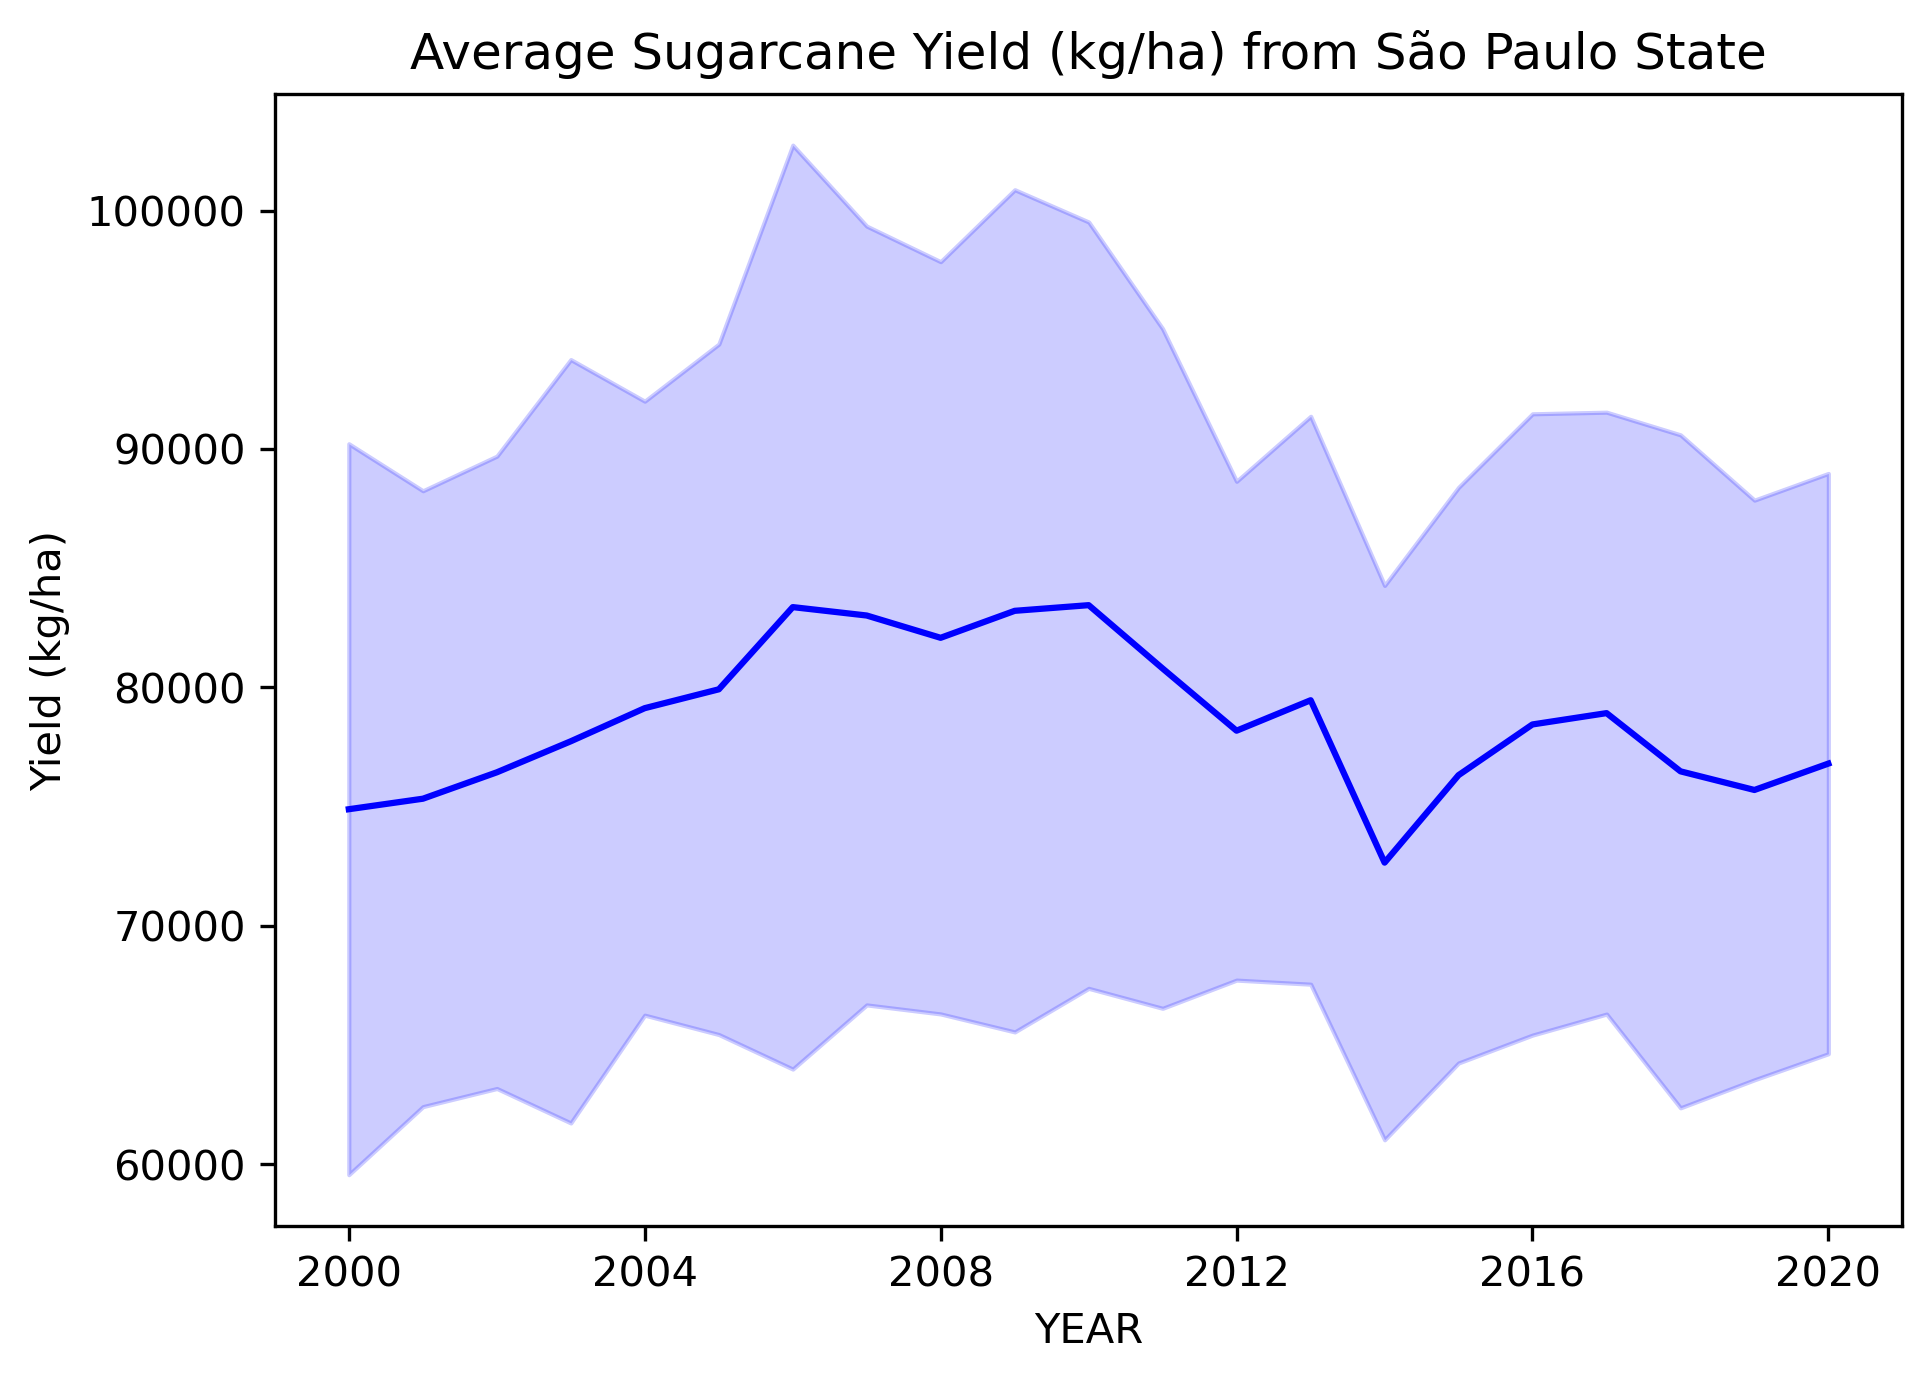

In [141]:
## Plot mean and standard deviation
mean_plus_st = mean_st_merged['mean_yield'] +  mean_st_merged['st_yield']
mean_minus_st = mean_st_merged['mean_yield'] -  mean_st_merged['st_yield']

plt.figure(figsize=(7, 5), dpi=300)
plt.plot(mean_st_merged['YEAR_x'], mean_st_merged['mean_yield'], color = 'blue')
plt.fill_between(mean_st_merged['YEAR_x'], mean_plus_st, mean_minus_st, alpha = 0.2, color = 'blue')
plt.title("Average Sugarcane Yield (kg/ha) from São Paulo State")
plt.xlabel("YEAR")
plt.ylabel("Yield (kg/ha)")
plt.savefig('plot_avergae_st_yield.png', dpi=300)

plt.show()